# **_Apartment Prices Prediction Craiova_**

This notebook is made for predicting the mean apartment price in Craiova for the next 10 years

In [2]:
#modules
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("merged_data/craiova_apartment_prices_1900_2025.csv")

In [3]:
df.head()

,date,price_per_sqm
0,1900-01-01,622.14
1,1901-01-01,625.18
2,1902-01-01,628.63
3,1903-01-01,632.53
4,1904-01-01,635.58


In [4]:
df.tail()

,date,price_per_sqm
267,2025-06-01,10293.04
268,2025-07-01,10247.70
269,2025-08-01,10282.97
270,2025-09-01,10429.07
271,2025-10-01,10429.07


## **EDA**

In [5]:
df.describe()

,price_per_sqm
count,272.000000
mean,3612.236765
std,2747.757138
min,595.030000
25%,838.747500
50%,3229.705000
75%,5544.935000
max,10429.070000



### 1. Trend chart 1900-2025


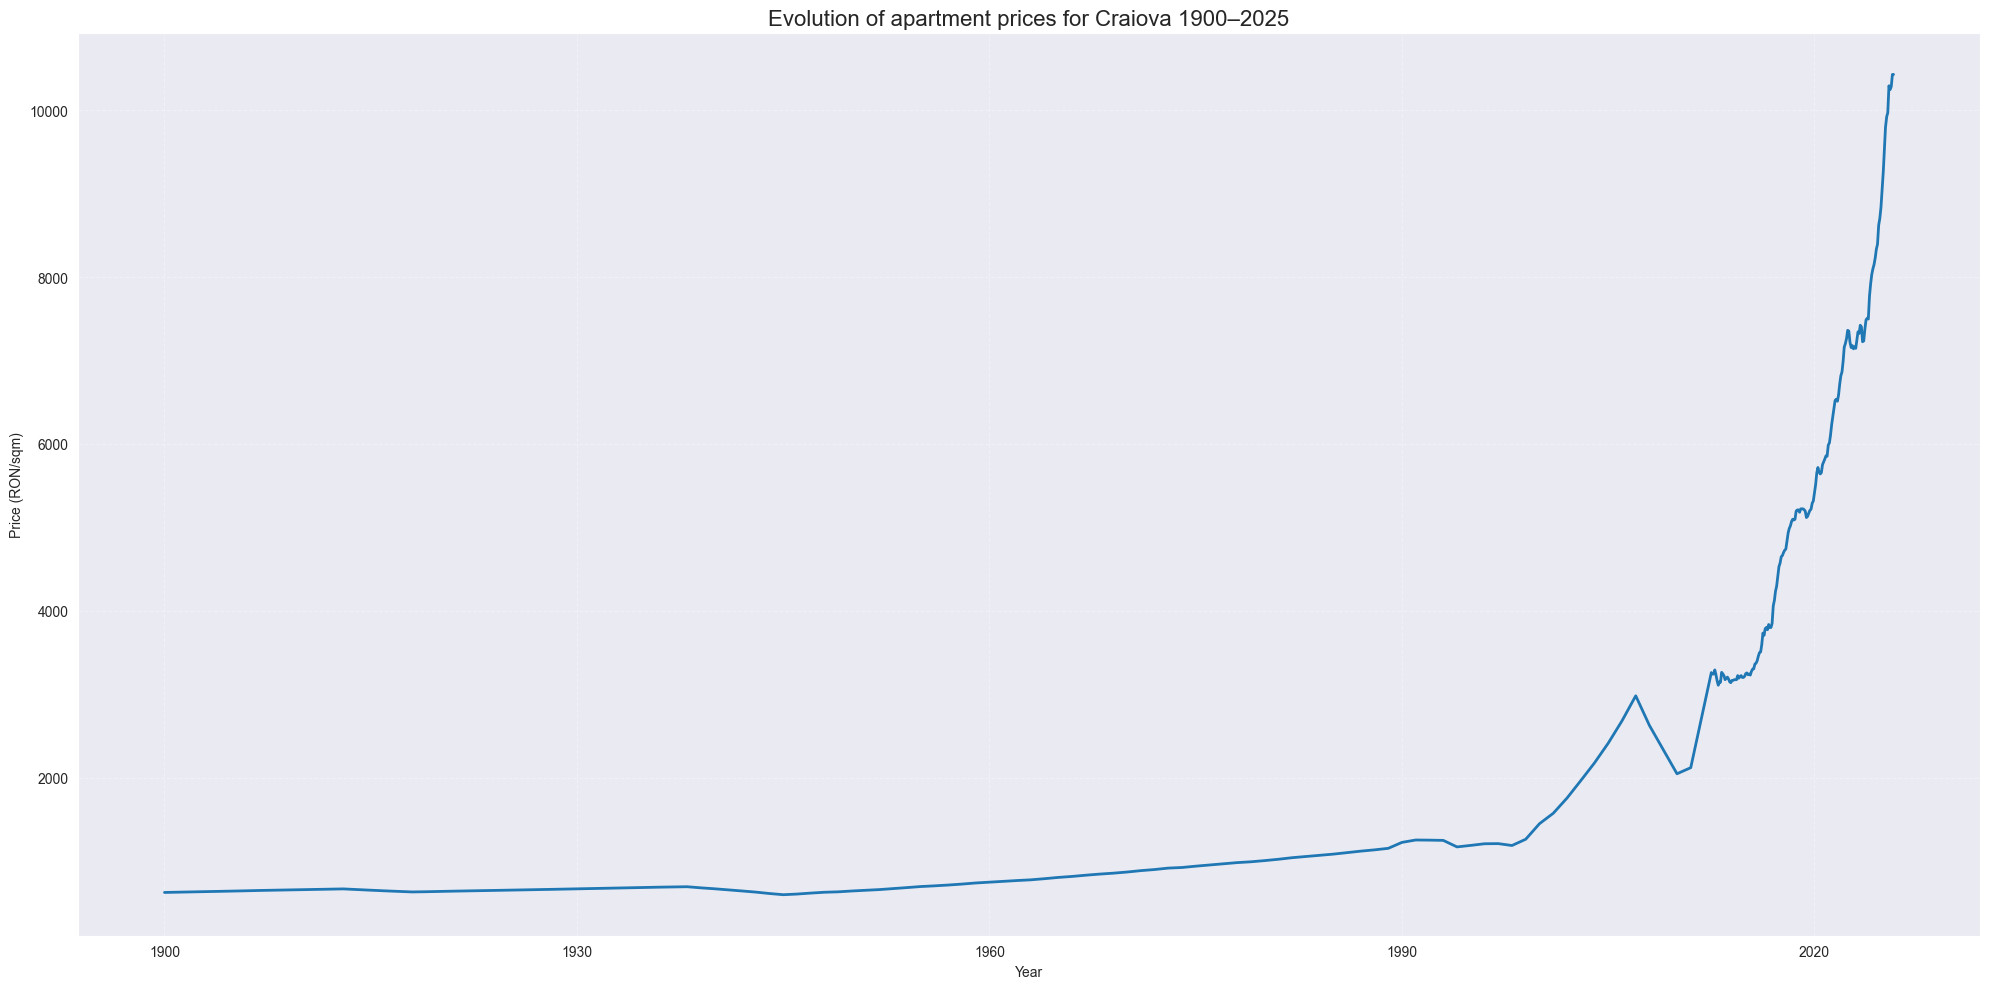

In [18]:
df['date'] = pd.to_datetime(df['date'])

years = [1900, 1930, 1960, 1990, 2020]
ticks = [pd.Timestamp(f"{y}-01-01") for y in years]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['date'], df['price_per_sqm'], linewidth=2)

ax.set_title("Evolution of apartment prices for Craiova 1900–2025", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Price (RON/sqm)")

ax.set_xticks(ticks)
ax.set_xticklabels([str(y) for y in years])

ax.grid(True, linestyle='--', alpha=0.3)
fig.tight_layout()
plt.show()


### 2. Price distribution 1900 - 2025


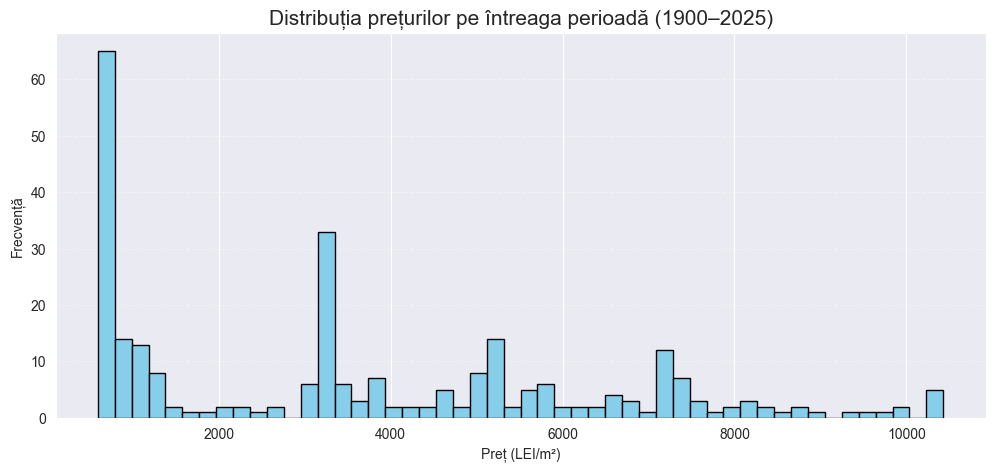

In [7]:
plt.figure(figsize=(12,5))
plt.hist(df["price_per_sqm"], bins=50, color="skyblue", edgecolor="black")
plt.title("Price distribution between 1900–2025", fontsize=15)
plt.xlabel("Price (RON/sqm)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


### 3. Boxplot over decades — outlier detection + era comparison


<Figure size 1600x600 with 0 Axes>

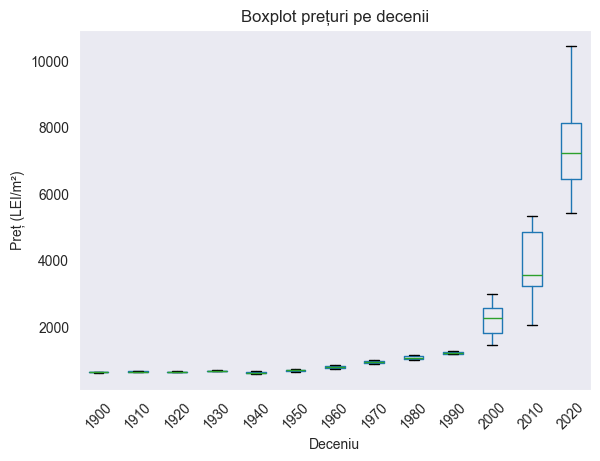

In [8]:
df["date"] = pd.to_datetime(df["date"])
df["decade"] = (df["date"].dt.year // 10) * 10

plt.figure(figsize=(16,6))
df.boxplot(column="price_per_sqm", by="decade", grid=False)
plt.title("Price boxplot over decades")
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Price (RON/sqm)")
plt.xticks(rotation=45)
plt.show()


### 4. Rate of Change (ROC) — % annual increase/decrease

This indicates:

-WW1 decline,

-WW2 decline,

-boom between 2000–2007,

-crisis in 2008.

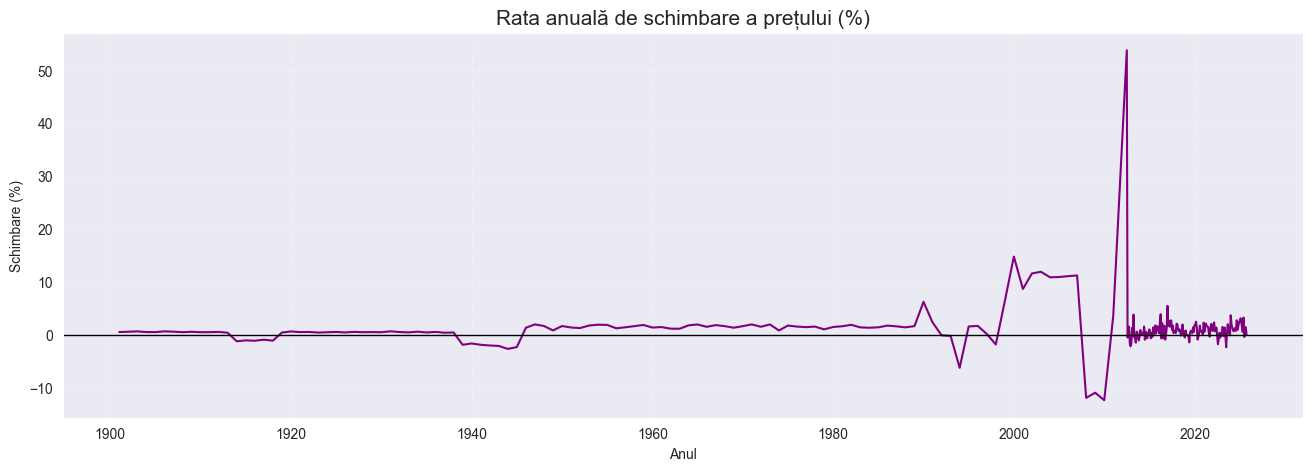

In [9]:
df["pct_change"] = df["price_per_sqm"].pct_change() * 100

plt.figure(figsize=(16,5))
plt.plot(df["date"], df["pct_change"], color="purple")
plt.axhline(0, color='black', linewidth=1)
plt.title("Annual rate of price change in percentage (%)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Change in %")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 5. Applying Rolling Mean


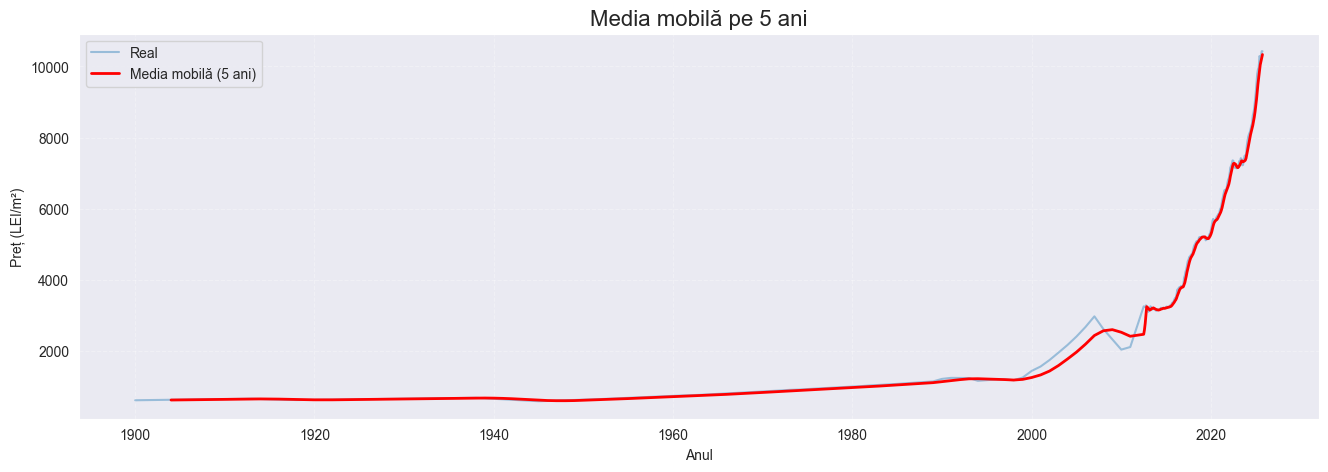

In [10]:
df["rolling_5"] = df["price_per_sqm"].rolling(window=5).mean()

plt.figure(figsize=(16,5))
plt.plot(df["date"], df["price_per_sqm"], alpha=0.4, label="Real")
plt.plot(df["date"], df["rolling_5"], color="red", linewidth=2, label="Rolling mean (5 years)")
plt.title("Rolling mean over 5 years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 6. Time Series Decomposition (trend, season, residuals)

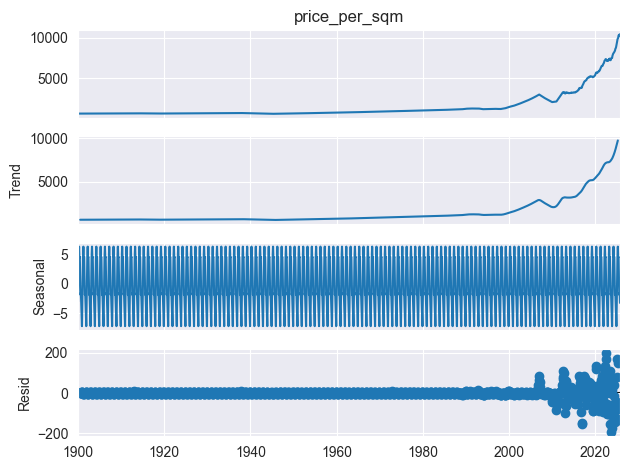

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_monthly = df.set_index("date").resample("MS").interpolate()

res = seasonal_decompose(df_monthly["price_per_sqm"], model="additive", period=12)
res.plot()
plt.show()


### 7. Scatter Plot — price vs. numerical year


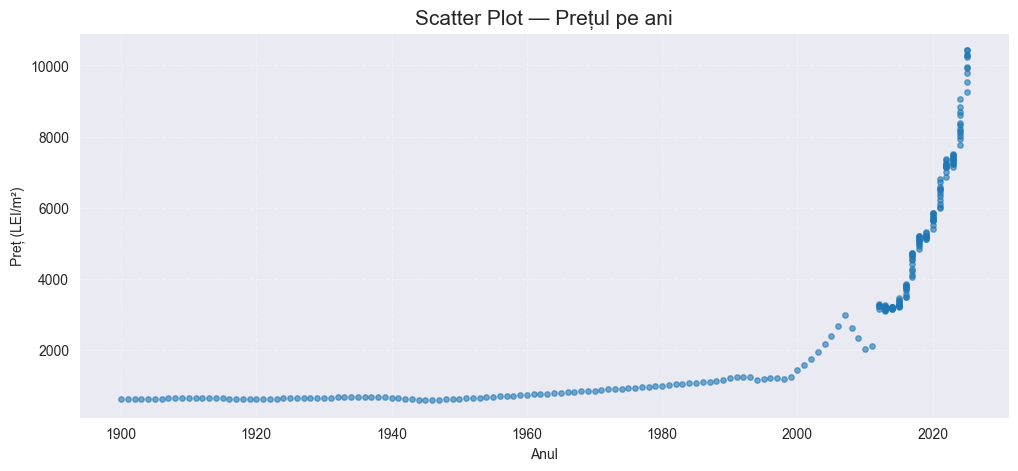

In [12]:
df["year"] = df["date"].dt.year

plt.figure(figsize=(12,5))
plt.scatter(df["year"], df["price_per_sqm"], s=15, alpha=0.6)
plt.title("Scatter Plot — Price over years", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


### 8. Heatmap by decades and historical regions of the series


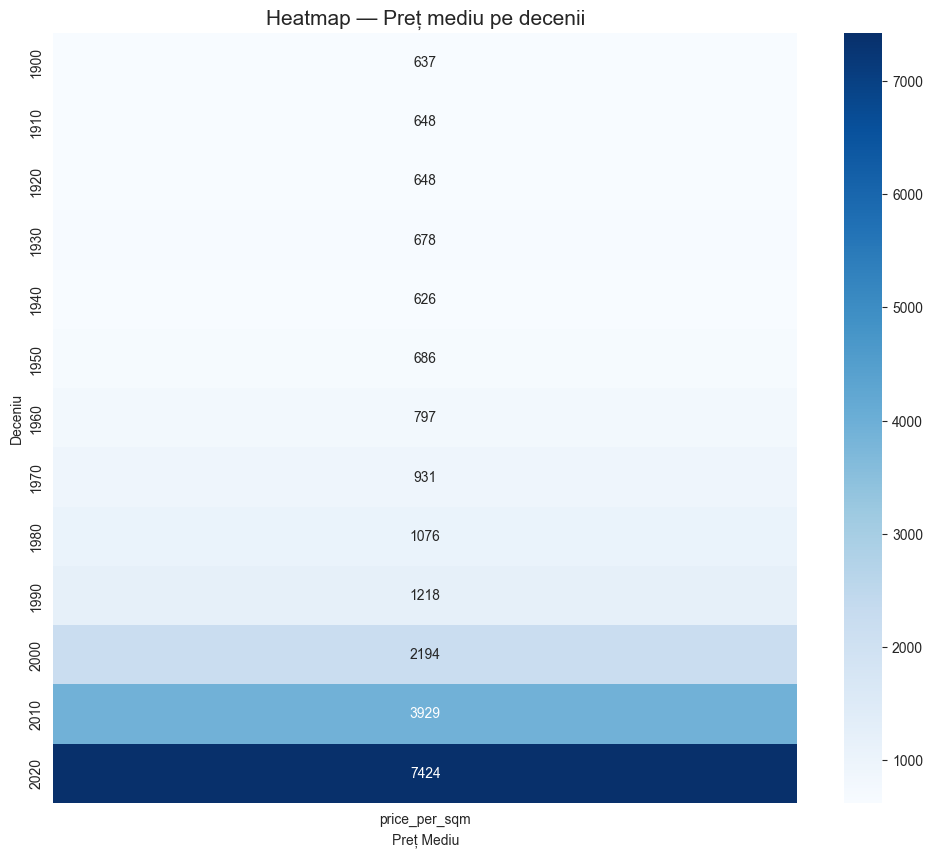

In [13]:
import seaborn as sns

pivot = df.pivot_table(values="price_per_sqm", index="decade", aggfunc="mean")

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".0f")
plt.title("Heatmap — Average price over decades", fontsize=15)
plt.xlabel("Average Price")
plt.ylabel("Decade")
plt.show()


### 9. Highlighting over historical periods

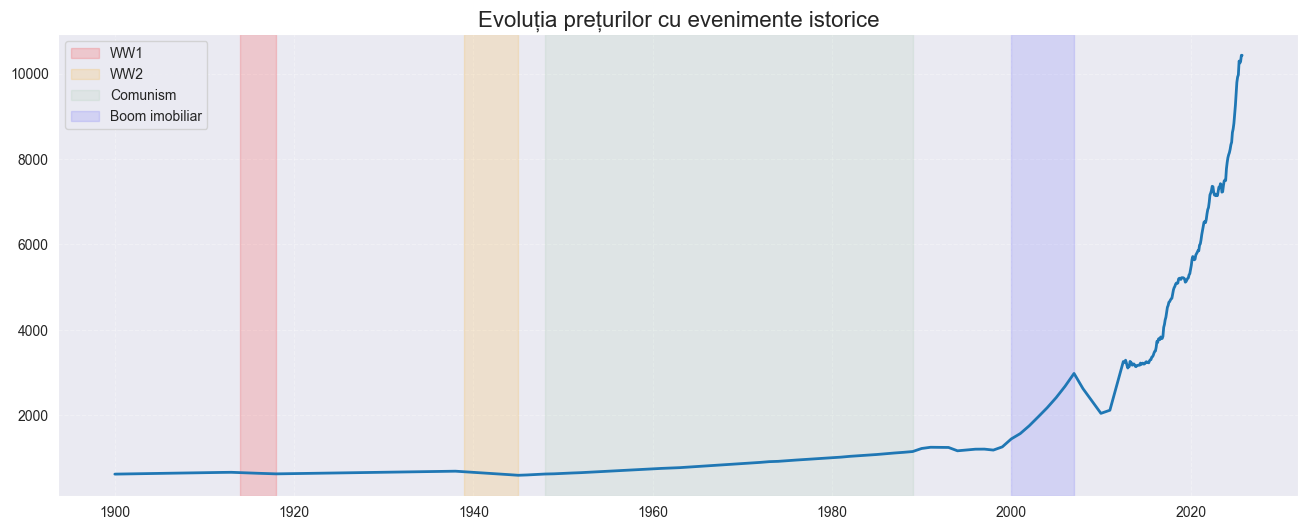

In [14]:
plt.figure(figsize=(16,6))
plt.plot(df["date"], df["price_per_sqm"], linewidth=2)

#WW1
plt.axvspan("1914", "1918", color="red", alpha=0.15, label="WW1")

#WW2
plt.axvspan("1939", "1945", color="orange", alpha=0.15, label="WW2")

#Comunism
plt.axvspan("1948", "1989", color="green", alpha=0.05, label="Comunism")

#Boom 2000–2007
plt.axvspan("2000", "2007", color="blue", alpha=0.1, label="Boom of real estate")

plt.legend()
plt.title("Price evolution with historical events", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


### 10. Autocorrelation Plot (ACF) — to see long-term dependencies

This graph shows us:

-if prices are time-dependent

-how “long” the memory of the series is

-if there is cyclicality

-if ARIMA/Prophet will work well

<Figure size 1200x500 with 0 Axes>

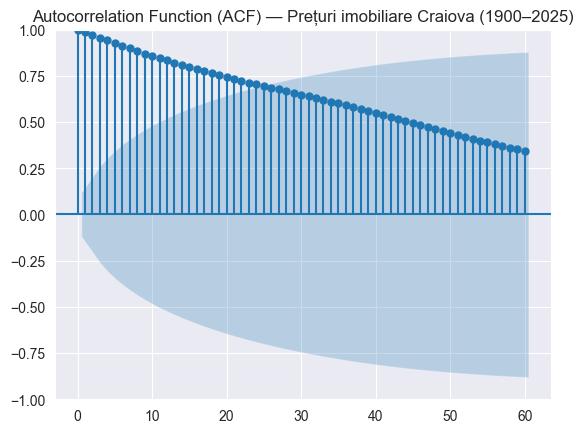

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plot_acf(df["price_per_sqm"], lags=60)
plt.title("Autocorrelation Function (ACF) — apartment prices in Craiova between 1900–2025")
plt.show()


### 11. Partial Autocorrelation Plot (PACF)


<Figure size 1200x500 with 0 Axes>

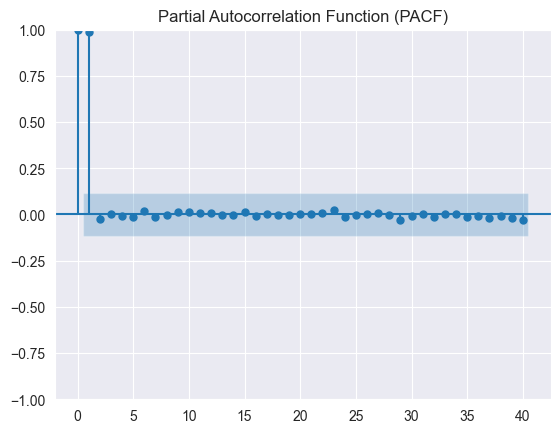

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,5))
plot_pacf(df["price_per_sqm"], lags=40, method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

## Predictions over 10 years for Craiova

In [17]:
df = df.set_index("date")

# 3. Resampling to monthly frequency (MS = Month Start)
#  - 1900-2011: annual values will "stretch" over months by interpolation
#  - 2012-2025: the values remain practically unchanged (already monthly)

df_monthly = df.resample("MS").interpolate("linear")

In [19]:
df_monthly.head()

,price_per_sqm,decade,pct_change,rolling_5,year
date,,,,,
1900-01-01,622.140000,1900.0,NaN,NaN,1900.000000
1900-02-01,622.393333,1900.0,NaN,NaN,1900.083333
1900-03-01,622.646667,1900.0,NaN,NaN,1900.166667
1900-04-01,622.900000,1900.0,NaN,NaN,1900.250000
1900-05-01,623.153333,1900.0,NaN,NaN,1900.333333


In [ ]:
df_monthly.tail()

## Monthly series between 1900 - 2025

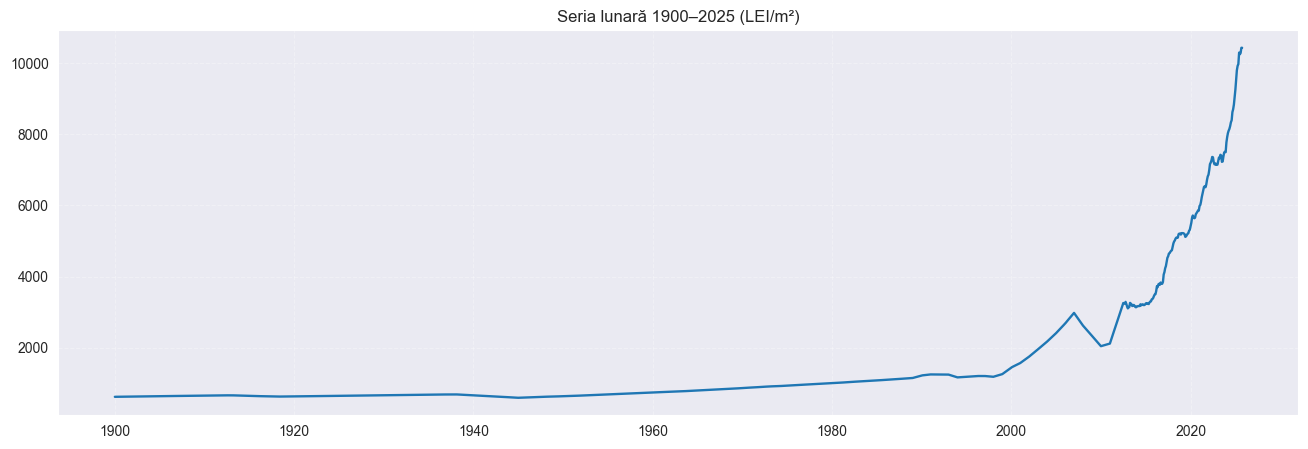

In [20]:
plt.figure(figsize=(16,5))
plt.plot(df_monthly.index, df_monthly["price_per_sqm"], linewidth=1.7)
plt.title("Monthly series between 1900–2025 (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

## State Space Model training

In [21]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
#The series we are modeling
y = df_monthly["price_per_sqm"]

#State Space Model: local trend + monthly seasonality
mod = UnobservedComponents(
    y,
    level="local linear trend",  #level + slope that updates over time
    seasonal=12                  #annual seasonality (12 months)
)

res = mod.fit()
print(res.summary())

                            Unobserved Components Results                            
Dep. Variable:                 price_per_sqm   No. Observations:                 1510
Model:                    local linear trend   Log Likelihood               -6767.567
                   + stochastic seasonal(12)   AIC                          13543.135
Date:                       Thu, 04 Dec 2025   BIC                          13564.380
Time:                               11:33:11   HQIC                         13551.050
Sample:                           01-01-1900                                         
                                - 10-01-2025                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   4.34e-10      3.461   1.25e-10      1

## Forecast over 10 years

In [22]:
#10 years = 120 months
steps = 10 * 12

forecast_res = res.get_forecast(steps=steps)
mean_forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

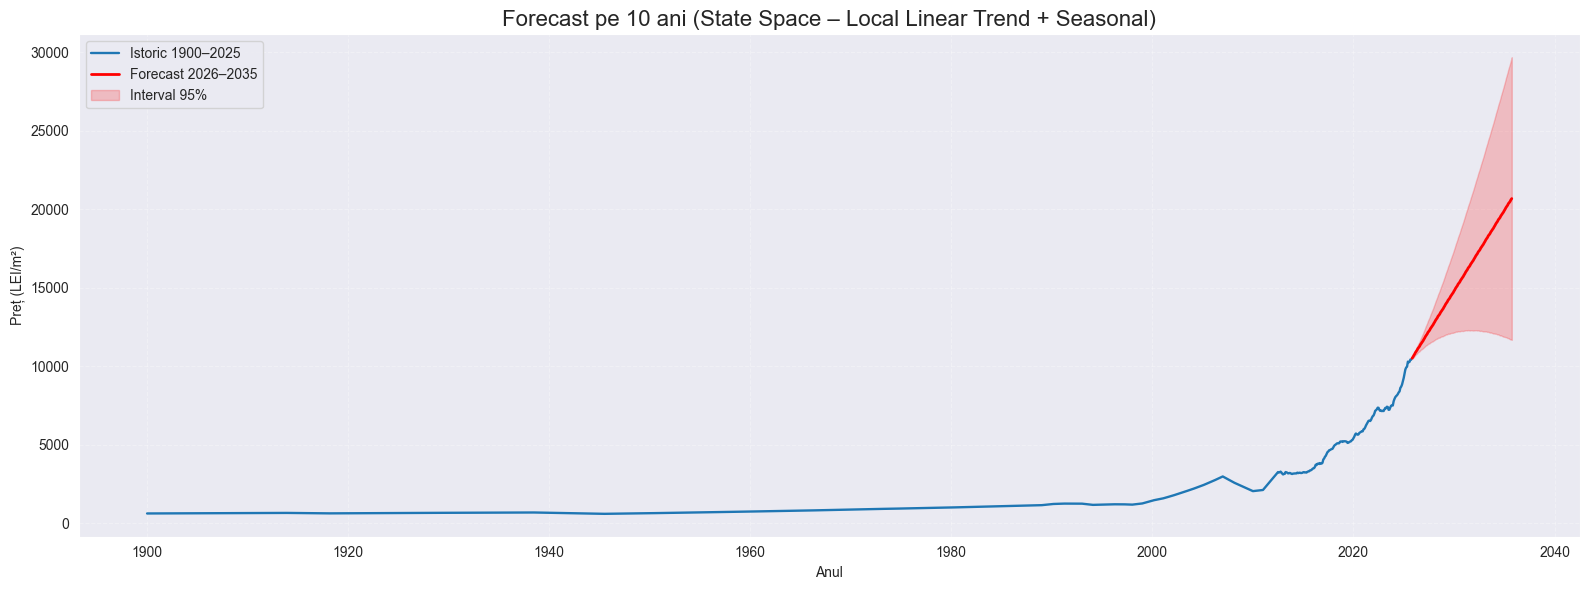

In [23]:
plt.figure(figsize=(16,6))

plt.plot(
    y.index, y,
    label="History between 1900–2025",
    linewidth=1.7,
)

#Forecast
plt.plot(
    mean_forecast.index, mean_forecast,
    label="Forecast for 2026–2035",
    color="red",
    linewidth=2,
)

#Confidence interval
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="red",
    alpha=0.2,
    label="Interval 95%",
)

plt.title("10-year Forecast (State Space – Local Linear Trend + Seasonal)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
forecast_df = pd.DataFrame({
    "date": mean_forecast.index,
    "predicted_price": mean_forecast.values,
    "lower_ci": conf_int.iloc[:, 0].values,
    "upper_ci": conf_int.iloc[:, 1].values,
})

forecast_df.to_csv("results/state_space_forecast_2026_2035_monthly.csv", index=False)
print("Saved: state_space_forecast_2026_2035_monthly.csv")

Am salvat: state_space_forecast_2026_2035_monthly.csv


In [25]:
annual_forecast = (
    forecast_df
    .set_index("date")
    .resample("YE")
    .mean()
)

annual_forecast.index = annual_forecast.index.year

annual_forecast.to_csv("results/state_space_forecast_2026_2035_yearly.csv")
print("Saved: state_space_forecast_2026_2035_yearly.csv")

annual_forecast

Am salvat: state_space_forecast_2026_2035_yearly.csv


C:\Users\Andrei Necsulea\AppData\Local\Temp\ipykernel_21372\3696460388.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,predicted_price,lower_ci,upper_ci
date,,,
2025,10547.561448,10491.549300,10603.573596
2026,11157.624981,10888.872614,11426.377348
2027,12182.746243,11418.423782,12947.068704
2028,13207.867505,11799.598733,14616.136277
2029,14232.988768,12060.699848,16405.277687
2030,15258.110030,12218.307513,18297.912548
2031,16283.231293,12283.575374,20282.887211
2032,17308.352555,12264.670589,22352.034521
2033,18333.473817,12167.909437,24499.038198


## Forecast 1900 - 2035

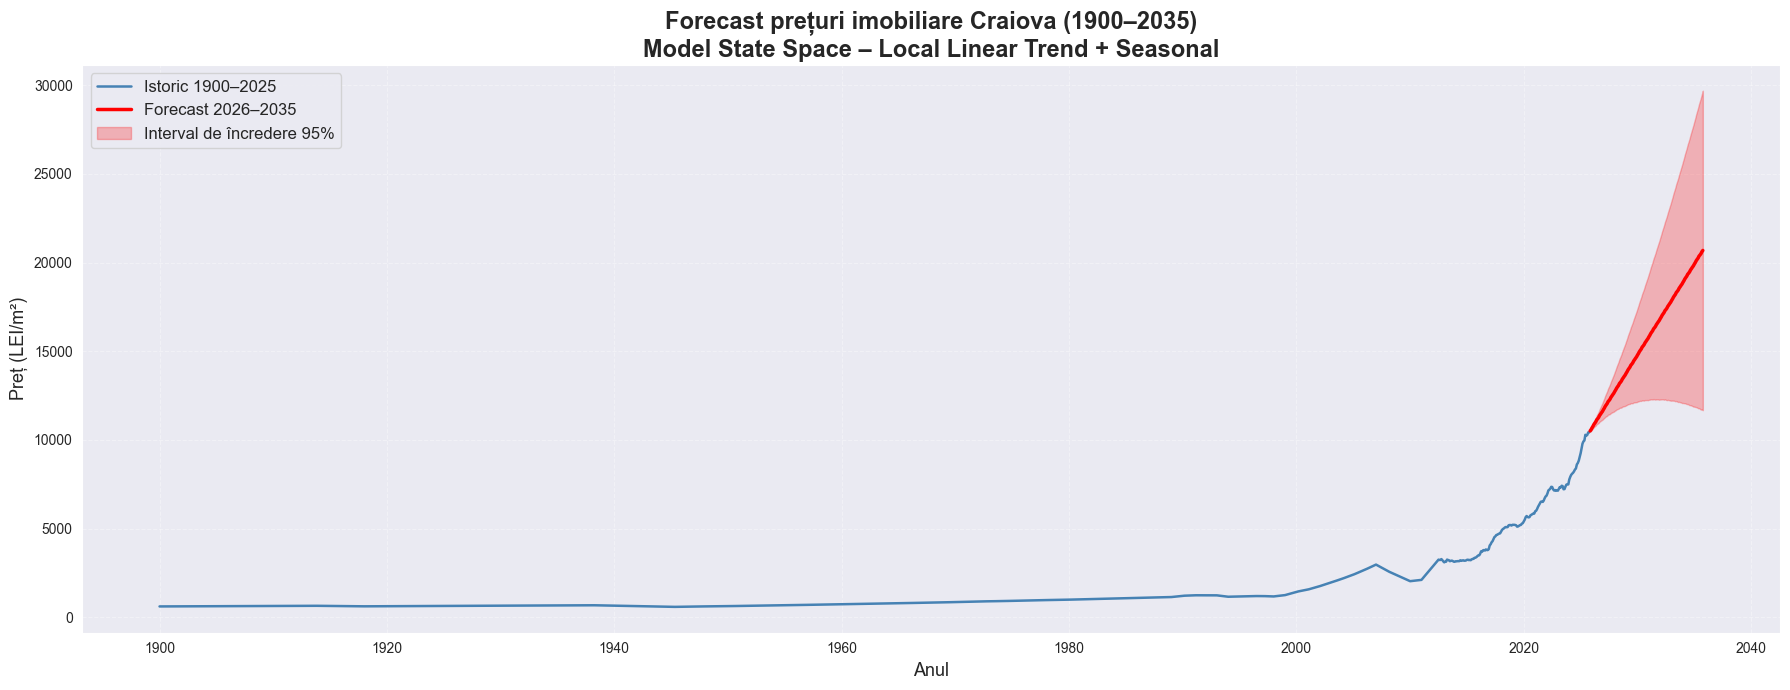

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))

plt.plot(
    y.index,
    y,
    label="History between 1900–2025",
    linewidth=1.8,
    color="steelblue"
)

#Forecast 2026–2035
plt.plot(
    mean_forecast.index,
    mean_forecast,
    label="Forecast 2026–2035",
    linewidth=2.5,
    color="red"
)

#Confidence Interval
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="red",
    alpha=0.25,
    label="Confidence Interval 95%"
)

plt.title("Apartment prices forecast for Craiova between 1900–2035\nModel State Space – Local Linear Trend + Seasonal",
          fontsize=17, fontweight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price (RON/sqm)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("results/forecast_1900_2035_statespace.png", dpi=220)
plt.show()

## Forecast 2026 - 2035

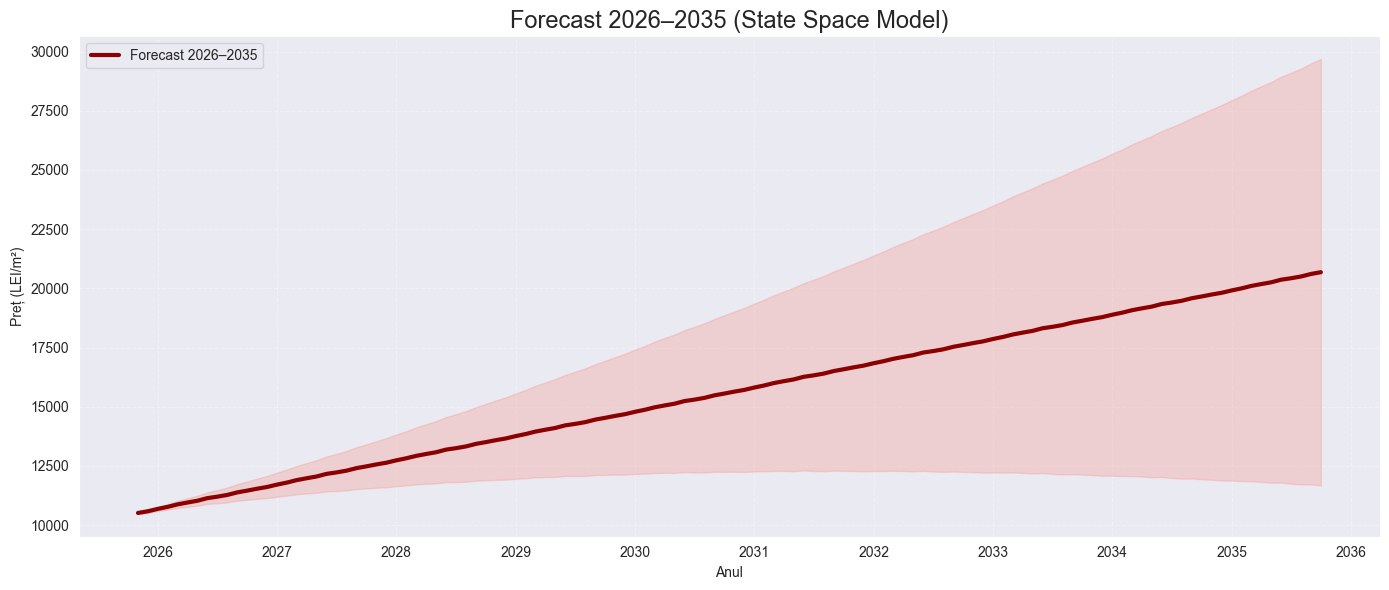

In [27]:
plt.figure(figsize=(14,6))

plt.plot(
    mean_forecast.index,
    mean_forecast,
    color="darkred",
    linewidth=3,
    label="Forecast 2026–2035"
)

plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="salmon",
    alpha=0.25
)

plt.title("Forecast 2026–2035 (State Space Model)", fontsize=17)
plt.xlabel("Year")
plt.ylabel("Price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig("results/forecast_2026_2035_statespace.png", dpi=220)
plt.show()

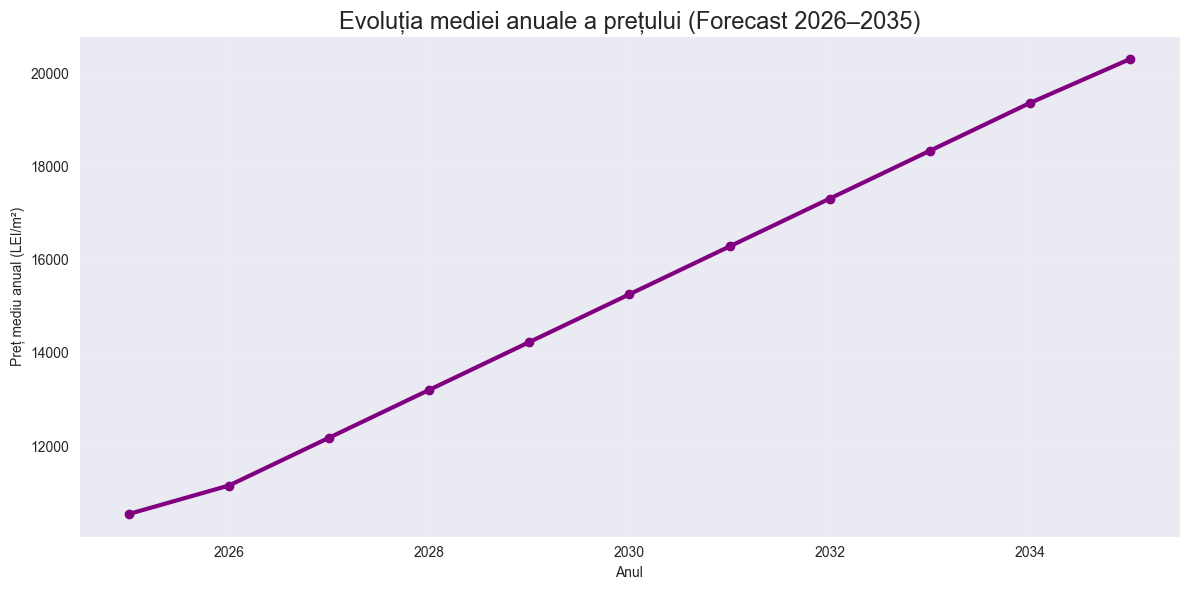

In [28]:
plt.figure(figsize=(12,6))
plt.plot(
    annual_forecast.index,
    annual_forecast["predicted_price"],
    marker="o",
    linewidth=3,
    color="purple"
)

plt.title("Evolution of the annual average price (Forecast 2026–2035)", fontsize=17)
plt.xlabel("Year")
plt.ylabel("Average annual price (RON/sqm)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()

plt.savefig("results/annual_forecast_2026_2035.png", dpi=220)
plt.show()

# Complete CSV data (added prediction between 2026 - 2035)

In [ ]:
import pandas as pd

df_hist = pd.read_csv("merged_data/craiova_apartment_prices_1900_2025.csv",
                      parse_dates=["date"])

df_forecast = pd.read_csv("results/state_space_forecast_2026_2035_yearly.csv",
                          parse_dates=["date"])

df_forecast = df_forecast.rename(columns={
    "predicted_price": "price_per_sqm",
    "forecast": "price_per_sqm"
})

df_forecast = df_forecast[["date", "price_per_sqm"]]

df_full = pd.concat([df_hist, df_forecast], ignore_index=True)

df_full = df_full.sort_values("date").reset_index(drop=True)

output_path = "results/craiova_apartment_prices_1900_2035.csv"
df_full.to_csv(output_path, index=False)

print("Final dataset saved successfully!")
print(output_path)